In [1]:
# """
# @author: Si Jie
# Data Scientist Technical Test
# Finantier 2021
# """

# Objective: This document is a technical test for a data scientist/machine learning engineer position at Finantier
# Supporting document(s): finantier_ds_technical_test_dataset.csv

# ------------------------------------------------ 	Instructions	 ------------------------------------------------------------------------

# 1. Given the data (csv), read the data into a pandas DataFrame. 
# 	Hint: The data has been tempered with and will require some cleaning. How you wish to clean it is up to you, but doing it programmatically will earn you more impressions :)

# 2. Using the data from step 1, implement a machine learning (ML) or deep learning (DL) model for the default classification problem. You will need to predict the likelihood of customer defaulting on telco payment based on their telco data.

# Note that the model that you are implementing should be a fairly recent model (within 3 years prior to today). 
# 	Where you can earn more impressions:
# 	- Good feature engineering will earn you more impression ponts. P.S. We do value quality over quantity.
# 	- Implementing a DL model that can handle tabular data (e.g. TabNet - https://arxiv.org/abs/1908.07442) will earn you more impression.
# 	- That said, it's much better to implement an ML model well than to implement a half-baked DL model
# 	- For whichever model that you are using, do provide the source of the github/library as well as the paper (if applicable).

# 	Hint: We aren't too fixated on the absolute value of the evaluation metric (e.g. 90+% for F1-score). Rather, we want to understand your thought process. We want to know  why you chose the evaluation metric. Thus, even if it is a low performance, but the steps are well-thought, we will love it as well.

# 3. Once your model from step 2 is completed, you will need to deploy it via an API endpoint. You can choose to use any framework/library. 
	
# 	Hint: If you aren't familiar with deployment on API, you can check out FastAPI (https://fastapi.tiangolo.com/) or Flask (https://flask-restful.readthedocs.io/en/latest/).
	
# 	Note: You should include testing for your API endpoint either using pytest (e.g. https://fastapi.tiangolo.com/tutorial/testing/) or unittest (e.g. https://www.datacamp.com/community/tutorials/unit-testing-python).

# 4. Deploy your API on a Docker using a Dockerfile. Once again, we are not looking for something too fancy. As long as your model and API endpoint can be deployed and run locally, we will fall in love with your code.
# 	Hints: 
# 	- https://docs.docker.com/develop/develop-images/dockerfile_best-practices/
# 	- https://hackernoon.com/flask-api-containerization-using-docker-2er31go
# 	- https://fastapi.tiangolo.com/deployment/docker/

# 5. Write a short readme.md of how to use the code that you have written. 
# You might want to consider the following points: How to run your docker, which API (plus parameters) to ping and how good your model is performing.
# If you feel that there are other things that are important in your code and will make it easier to understand, please feel free to add it into your readme.md.
# In short, anyone who reads it need can (at least) run your code and explain it without asking you anything.

# 6. Upload your readme.md onto your personal github and share the github repo with us (sijie@finantier.co).
# 	Hint: The repo name doesn't matter to us. If you like, you can even call it yellow-banana.

# --------------------------------------------------------------------------------------------------------------------------------------------

# - Overall, we adopt a "whole is greater than sum of its part" approach. This means that we would recommend you spend more time completing the whole test, rather than to enhance performance in any of the individual segments.
# - In other words, completing the whole test will gain you more points. 
# - However, if there are any parts of the test that you are stuck for a long time, feel free to skip it and submit just what you have done. 

# Lastly, if you have any question or doubt, feel free to check in with Si Jie (sijie@finantier.co).


In [2]:
# References
# https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# https://stackoverflow.com
# Past group project

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

# Import and initial cleaning

In [2]:
print("Current Working Directory " , os.getcwd())
data = pd.read_csv ('finantier_data_technical_test_dataset.csv',index_col=False) # if index_col not set, pandas assumes ID as index due to the error_error text on the right side 
data
# 7048 rows x 22 columns
data = data.drop('Unnamed: 21',axis =1) # drop last col containing error_error
data = data.dropna()  # drop rows with nan values, checked that we are losing a small amount of data only (5points)
data      
# 7043 rows x 21 columns

Current Working Directory  C:\Users\aaroncode\Desktop\Finantier


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Default
1,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7044,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7045,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7046,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Feature selection & conversion using domain knowledge

In [3]:
y = data.Default                         # Yes or No
list = ['Default','customerID','PaymentMethod','PaperlessBilling']
x = data.drop(list,axis = 1 )          # Drop unneccessary fields from features
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
1,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,29.85,29.85
2,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,56.95,1889.5
3,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15
4,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75
5,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65


In [4]:
# Convert Default col values to 0,1
y = (y == 'Yes').astype(int)

# Recognise, gender, Partner, Dependents and PhoneService can also be changed to 0,1 values 

# Change gender from (Male,Female) -> (0,1) respectively
x['gender'] = (x['gender'] == 'Female').astype(int)
# Change partner, dependents from (No,Yes) -> (0,1) respectively
x['Partner'] = (x['Partner'] == 'Yes').astype(int)
x['Dependents'] = (x['Dependents'] == 'Yes').astype(int)
x['PhoneService'] = (x['PhoneService'] == 'Yes').astype(int)
# Convert SeniorCitizen to int for good measure
x['SeniorCitizen'] = x['SeniorCitizen'].astype(int)

In [5]:
# Find whitespaces in this column (only this one had it) and replace with 0 
x['TotalCharges'] = x['TotalCharges'].replace(r'^\s+$',0,regex = True)
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'])
print(x.describe())
# Note that only tenure ,monthlycharges and totalcharges are the 'true' numeric variables the rest are technically categorical

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MonthlyCharges  TotalCharges  
count   7043.000000     7043.000000   7043.000000  
mean       0.903166       64.761692   2279.734304  
std        0.295752       30.090047   2266.794470  
min        0.000000       18.250000      0.000000  
25%        1.000000       35.500000    398.550000  
50%

# Exploratory analysis of output variable and numeric input variables

Number of Defaults:  1869
Number of Non-Defaults:  5174


C:\Users\aaroncode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


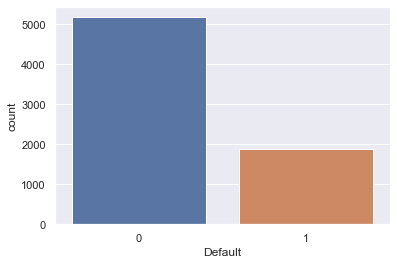

In [6]:
ax = sb.countplot(y,label="Count")       # No and Yes
N, Y = y.value_counts()    # Note that No is first, Yes is second
print('Number of Defaults: ',Y)
print('Number of Non-Defaults: ',N)
# ~ 3 times more non-defaults than defaults, optimise to account for this diff via SMOTE?

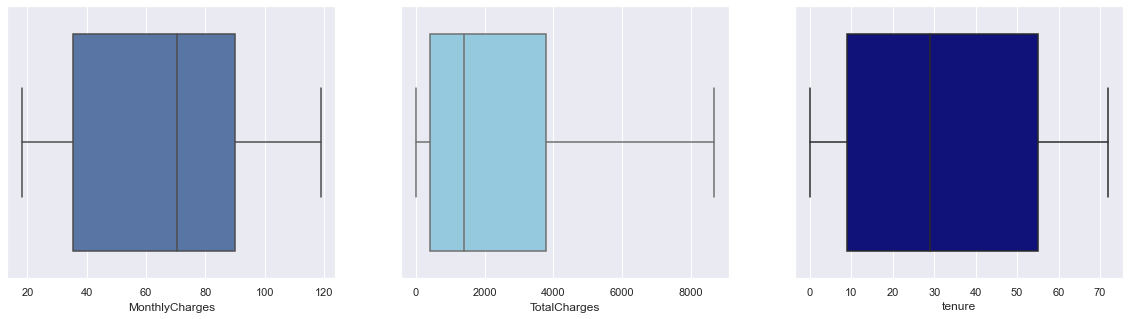

In [7]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
sb.boxplot(x=x["MonthlyCharges"],ax=axs[0])
sb.boxplot(x=x["TotalCharges"],ax=axs[1],color='skyblue')
sb.boxplot(x=x["tenure"],ax=axs[2],color='darkblue')

C:\Users\aaroncode\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


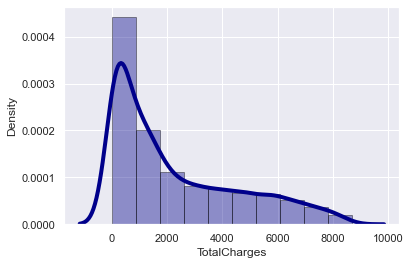

In [8]:
sb.distplot(x['TotalCharges'], hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Logistic Regression Modelling + One-Hot Encoding

In [9]:
# One hot encoding of the remaining categorical variables
x_encoded = pd.get_dummies(x) # Store as x_encoded first
print(np.shape(x_encoded))
x_encoded.head()

(7043, 35)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
1,1,0.0,1,0,1.0,0,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,0.0,0,0,34.0,1,56.95,1889.50,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0.0,0,0,2.0,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0.0,0,0,45.0,0,42.30,1840.75,0,1,...,1,1,0,0,1,0,0,0,1,0
5,1,0.0,0,0,2.0,1,70.70,151.65,1,0,...,0,1,0,0,1,0,0,1,0,0


In [10]:
# Splitting the dataset into the Training set and Test set, 25/75 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
# Create your classifier here
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0,max_iter =300)    # Found 300 by trial error
logmodel.fit(X_train, y_train)

# # Predicting the Test set results
# y_train_pred = logmodel.predict(X_train)
# y_test_pred = logmodel.predict(X_test)

LogisticRegression(max_iter=300, random_state=0)

In [13]:
# Use precision-recall curve instead
# from sklearn.metrics import classification_report
# print("Test data F-1 statistics")
# print(classification_report(y_test,y_test_pred))
# print("Train data F-1 statistics")
# print(classification_report(y_train,y_train_pred))

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8046194623248769

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7881885292447472



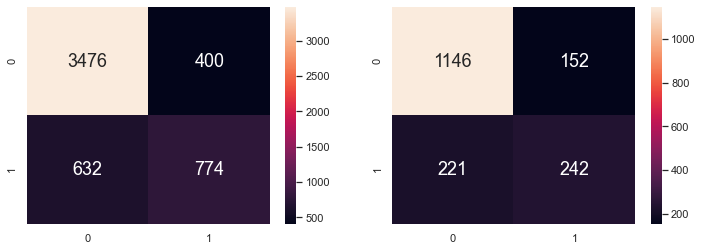

In [12]:
# Actual class predictions
rf_predictions1 = logmodel.predict(X_train)
rf_predictions = logmodel.predict(X_test)

# Probabilities for each class

rf_probs = logmodel.predict_proba(X_test)
rf_probs

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logmodel.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logmodel.score(X_test, y_test))
print()

from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_predictions1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Text(0.5, 1.0, 'Confusion Matrix for test data')

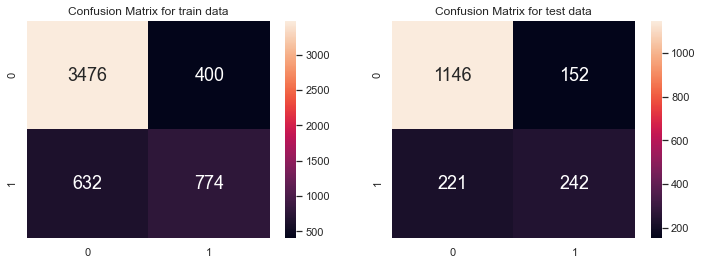

In [14]:
# from sklearn.metrics import confusion_matrix
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_train, y_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_test, y_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
# axes[0].set_title("Confusion Matrix for train data")
# axes[1].set_title("Confusion Matrix for test data")

Average precision score: 0.612


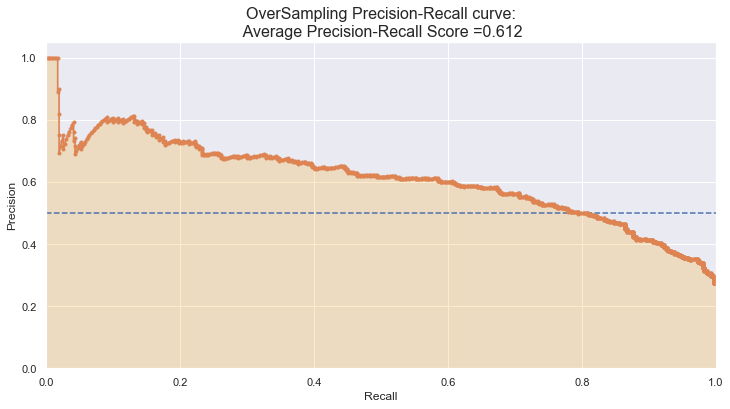

AUC: 0.612


In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
rf_predictions = logmodel.predict_proba(X_test) # actual outputs from the model
average_precision = average_precision_score(y_test, rf_predictions[:,1])
print("Average precision score: {:.3f}".format(average_precision))
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_predictions[:,1])

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\n Average Precision-Recall Score ={0:0.3f}'.format(
          average_precision), fontsize=16)
precision, recall, thresholds = precision_recall_curve(y_test,rf_predictions[:,1])
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)
# AUC 0.612

# SMOTE + Logistic Regression + OHE

In [14]:
# One hot encoding of the remaining categorical variables
x_encoded = pd.get_dummies(x) # Store as x_encoded first
print(np.shape(x_encoded))
x_encoded.head()

(7043, 35)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
1,1,0.0,1,0,1.0,0,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,0.0,0,0,34.0,1,56.95,1889.50,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0.0,0,0,2.0,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0.0,0,0,45.0,0,42.30,1840.75,0,1,...,1,1,0,0,1,0,0,0,1,0
5,1,0.0,0,0,2.0,1,70.70,151.65,1,0,...,0,1,0,0,1,0,0,1,0,0


In [15]:
# SMOTE if needed, address the imbalanced dataset
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=101)
columns = X_train.columns
X_train_os,y_train_os=os.fit_resample(X_train, y_train)

# #dont think need smote actly ,doesnt rly make much diff


In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
# Create your classifier here
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0,max_iter =300)    # Found 300 by trial error
logmodel.fit(X_train, y_train)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.801419878296146

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7988641741599621



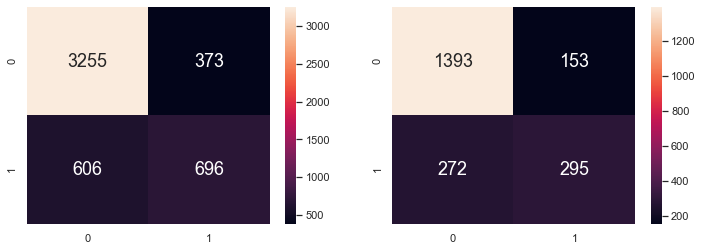

In [17]:
# Actual class predictions
rf_predictions1 = logmodel.predict(X_train)
rf_predictions = logmodel.predict(X_test)

# Probabilities for each class

rf_probs = logmodel.predict_proba(X_test)
rf_probs

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logmodel.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logmodel.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_predictions1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Average precision score: 0.657


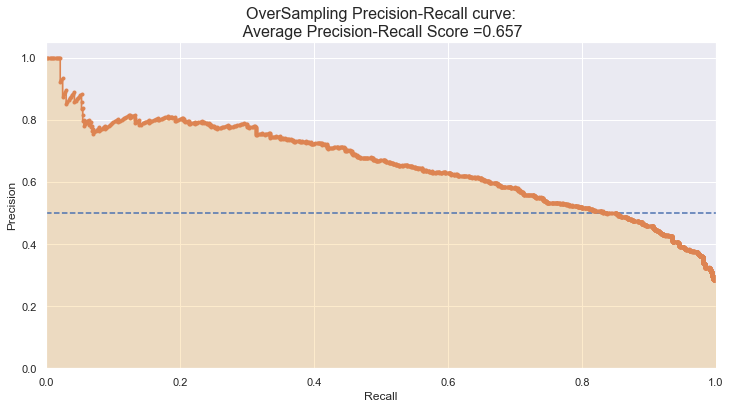

AUC: 0.656


In [18]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
rf_predictions = logmodel.predict_proba(X_test) # actual outputs from the model
average_precision = average_precision_score(y_test, rf_predictions[:,1])
print("Average precision score: {:.3f}".format(average_precision))
# Improvement from non-smote 0.612

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_predictions[:,1])

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\n Average Precision-Recall Score ={0:0.3f}'.format(
          average_precision), fontsize=16)
precision, recall, thresholds = precision_recall_curve(y_test,rf_predictions[:,1])
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)
# AUC 0.656

# Random Forest Classification

In [19]:
# One hot encoding of the remaining categorical variables
x_encoded = pd.get_dummies(x) # Store as x_encoded first
print(np.shape(x_encoded))
x_encoded.head()

(7043, 35)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
1,1,0.0,1,0,1.0,0,29.85,29.85,0,1,...,0,1,0,0,1,0,0,1,0,0
2,0,0.0,0,0,34.0,1,56.95,1889.50,1,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0.0,0,0,2.0,1,53.85,108.15,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0.0,0,0,45.0,0,42.30,1840.75,0,1,...,1,1,0,0,1,0,0,0,1,0
5,1,0.0,0,0,2.0,1,70.70,151.65,1,0,...,0,1,0,0,1,0,0,1,0,0


In [20]:
# SMOTE if needed
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=101)
columns = X_train.columns
X_train_os,y_train_os=os.fit_resample(X_train, y_train)

# #dont think need smote actly ,doesnt rly make much diff


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees

random_forest_model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt',max_depth=5)

# Fit on training data

random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8010141987829614

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7988641741599621



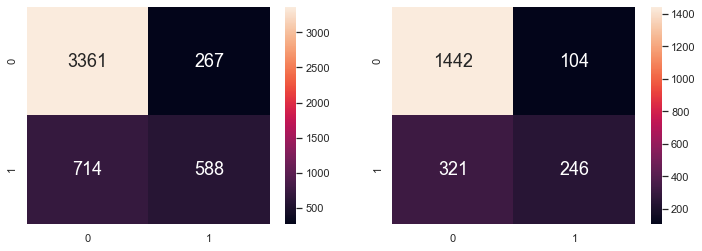

In [22]:
# Actual class predictions
rf_predictions1 = random_forest_model.predict(X_train)
rf_predictions = random_forest_model.predict(X_test)

# Probabilities for each class

rf_probs = random_forest_model.predict_proba(X_test)
rf_probs

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", random_forest_model.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", random_forest_model.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_predictions1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Average precision score: 0.657


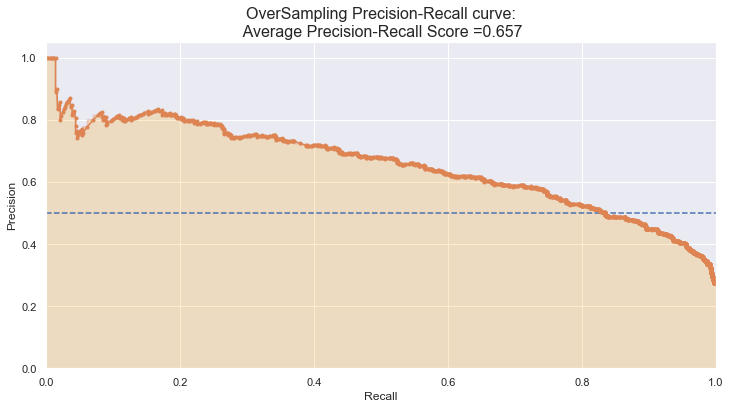

AUC: 0.656


In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
rf_predictions = random_forest_model.predict_proba(X_test) # actual outputs from the model
average_precision = average_precision_score(y_test, rf_predictions[:,1])
print("Average precision score: {:.3f}".format(average_precision))
# Improvement from non-smote 0.612

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_predictions[:,1])

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\n Average Precision-Recall Score ={0:0.3f}'.format(
          average_precision), fontsize=16)
precision, recall, thresholds = precision_recall_curve(y_test,rf_predictions[:,1])
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)
# AUC 0.660

# SMOTE + LOG REG + Leave One Out Encoding

In [24]:
import category_encoders as ce
encoder = ce.LeaveOneOutEncoder()
encoder.fit(x, y)
x_dirty = x
x_encoded = encoder.transform(x_dirty)
x_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges
1,1,0.0,1,0,1.0,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,29.85,29.85
2,0,0.0,0,0,34.0,1,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804,0.112695,56.95,1889.50
3,0,0.0,0,0,2.0,1,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804,0.427097,53.85,108.15
4,0,0.0,0,0,45.0,0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804,0.112695,42.30,1840.75
5,1,0.0,0,0,2.0,1,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804,0.427097,70.70,151.65


In [25]:
# SMOTE if needed, address the imbalanced dataset
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=101)
columns = X_train.columns
X_train_os,y_train_os=os.fit_resample(X_train, y_train)

# #dont think need smote actly ,doesnt rly make much diff


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
# Create your classifier here
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0,max_iter =300)    # Found 300 by trial error
logmodel.fit(X_train, y_train)



LogisticRegression(max_iter=300, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8010141987829614

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7988641741599621



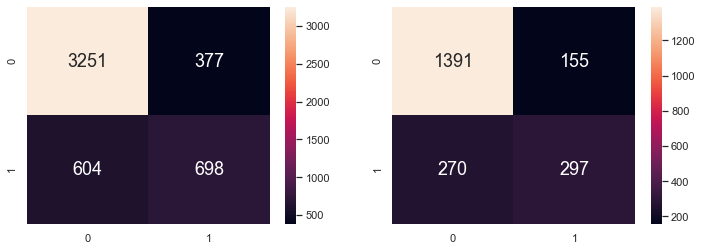

In [29]:
# Actual class predictions
rf_predictions1 = logmodel.predict(X_train)
rf_predictions = logmodel.predict(X_test)

# Probabilities for each class

rf_probs = logmodel.predict_proba(X_test)
rf_probs

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logmodel.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logmodel.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_predictions1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_predictions), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Average precision score: 0.656


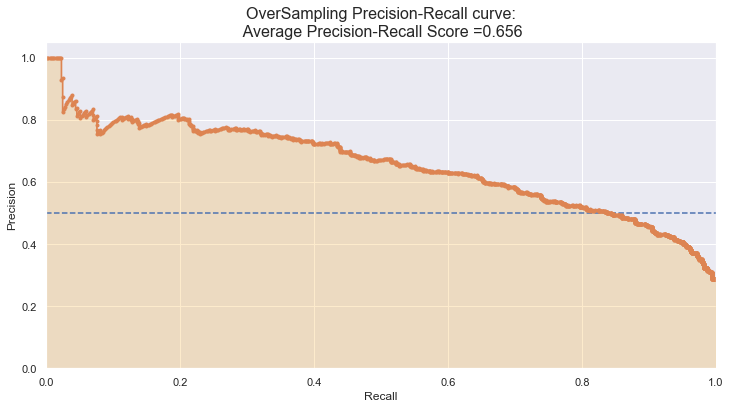

AUC: 0.656


In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
rf_predictions = logmodel.predict_proba(X_test) # actual outputs from the model
average_precision = average_precision_score(y_test, rf_predictions[:,1])
print("Average precision score: {:.3f}".format(average_precision))
# Improvement from non-smote 0.612

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_predictions[:,1])

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve:\n Average Precision-Recall Score ={0:0.3f}'.format(
          average_precision), fontsize=16)
precision, recall, thresholds = precision_recall_curve(y_test,rf_predictions[:,1])
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)
# AUC 0.656, no diff from one-hot